# Nikita Kiran More(Batch 25 Jan)

# Multiple Linear Regression

Assignment Task: Multiple Linear Regression
Your task is to perform a multiple linear regression analysis to predict
the price of Toyota corolla based on the given attributes.

# 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

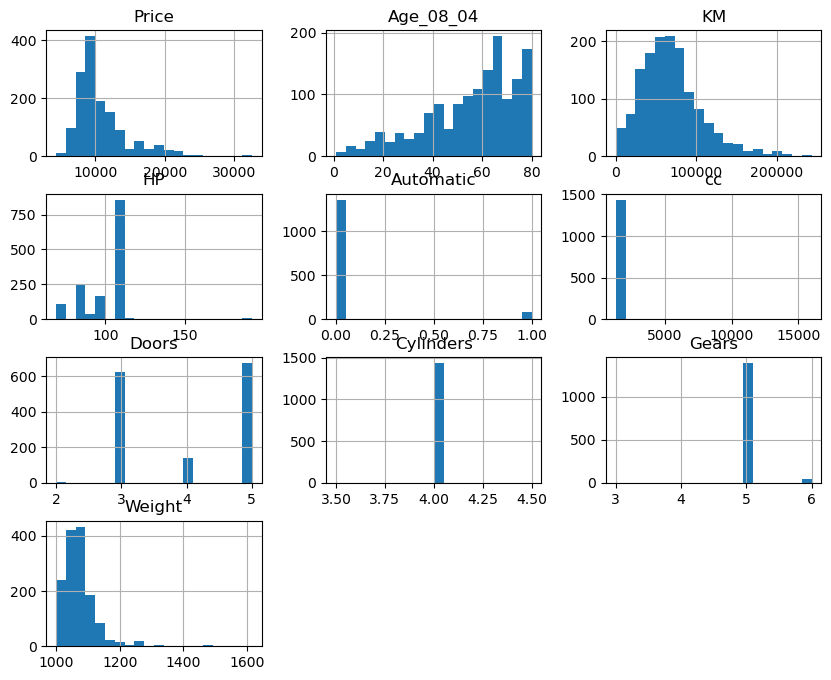

In [9]:
df.hist(bins=20, figsize=(10, 8))

In [10]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [11]:
plt.show()

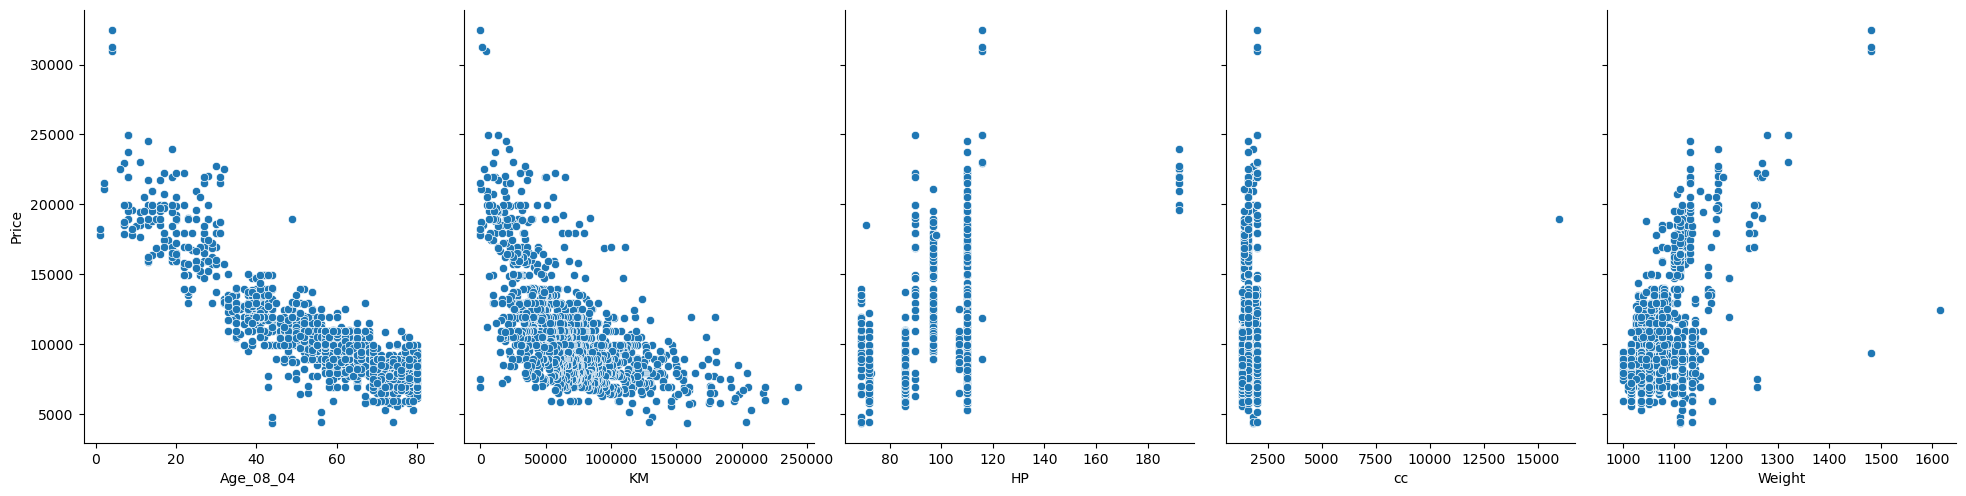

In [12]:
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], y_vars='Price', height=5, aspect=0.8)

In [13]:
plt.show()

In [16]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [17]:
corr = df_encoded.corr()

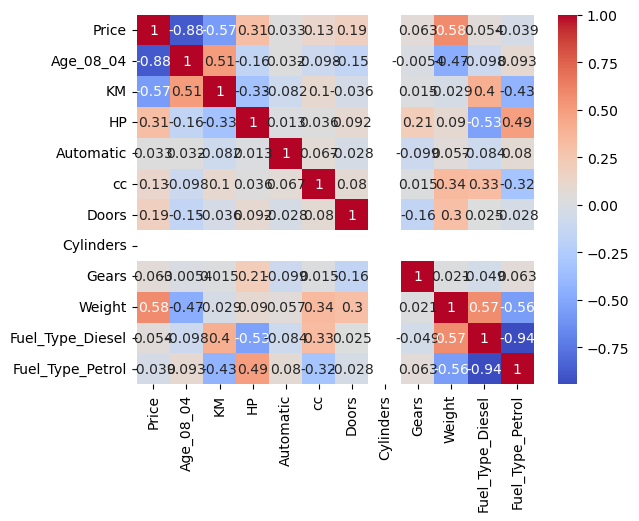

In [19]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# 2.Split the dataset into training and testing sets
(e.g., 80% training, 20% testing).

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [21]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [23]:
X=df.drop(columns=['Price'])
y=df["Price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((1148, 11), (288, 11))

# 3.Build a multiple linear regression model 
using the training dataset. Interpret the coefficients 
of the model. Build minimum of 3 different models.

In [27]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -14255.38599356528
Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  3.69482223e-13  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


In [45]:
y_pred = model.predict(X_test)

In [46]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [47]:
X_train_sm = sm.add_constant(X_train_encoded)

# 4.Evaluate the performance of the model 
using appropriate evaluation metrics on the testing dataset.

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 990.8872739193927
Mean Squared Error: 2203043.8231437034
R-squared: 0.8348888040611082


# 5.Apply Lasso and Ridge methods on the model.

In [52]:
from sklearn.linear_model import Ridge, Lasso

In [53]:
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha value
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
print(f"Ridge R-squared: {r2_score(y_test, y_ridge_pred)}")

Ridge R-squared: 0.8351359377712331


In [54]:
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha value
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
print(f"Lasso R-squared: {r2_score(y_test, y_lasso_pred)}")

Lasso R-squared: 0.8349467801805


# Interview Questions
